_____

<table align="left" width=100%>
    <td>
        <div style="text-align: center;">
          <img src="./images/bar.png" alt="entidades financiadoras"/>
        </div>
    </td>
    <td>
        <p style="text-align: center; font-size:24px;"><b>Introduction to Data Science</b></p>
        <p style="text-align: center; font-size:18px;"><b>Master in Electrical and Computer Engineering</b></p>
        <p style="text-align: center; font-size:14px;"><b>Pedro Cardoso (pcardoso@ualg.pt)</b></p>
    </td>
</table>

_____

# Getting started with time series (TS) and panel data

## Definitions and notation

A __time series__ (TS) can be mathematically defined as a sequence of observations recorded at equally spaced intervals of time. Mathematically, a TS can be represented as a vector
$$X = [x_1, x_2, ..., x_n],$$
where $x_i$ represents the observation at the $i$-th time interval and $n$ is the total number of observations. The time interval can be defined as the interval between two consecutive observations, such as seconds, minutes, days, weeks, months, years etc.

Also, the mathematical definition of a time series can be represented as a function $X(t)$ that maps each time point $t$ to a corresponding observation $x_t$. Thus, a time series can be written as:
$$X(t) = x_t,$$
where $t$ is a continuous variable representing time.

We frequently have an interest in observations that were made in the past, also known as lag times or lags. The times of the past are inferior to the times of the present. For instance, $t-1$ represents the previous time and $t-2$ represents the prior time. $x_{t-1}$ (sames as $X(t-1)$) and $x_{t-2}$ (same as $X(t-2)$) are the observations for these periods, respectively. We are interested in predicting future times. For instance, the following time is $t+1$ and the following time is $t+2$. $x_{t+1} = X(t+1)$ and $x_{t+2} = X(t+2)$, respectively, represent the observations at these times.

We frequently omit the $x_{t+1}$ or $X(t+1)$ notation in favor of using $t+1$ and presume that we are discussing observations at times rather than the time indexes themselves. Moreover, we can use abbreviations to refer to an observation at a lag, such as a $lag$ of 10 or $lag=10$, which is equivalent to $t-10$.

To sum it up:
- $t-i$: A previous or lag time (e.g. $t-1$ for the previous time).
- $t$: The instant and frame of reference.
- $t+i$: A time in the future or a prediction (such as $t+1$ for the next time).

Example table of time series data:

| Date         | Value |
| ------------ | ----- |
| 2022-01-01   | 10    |
| 2022-01-02   | 15    |
| 2022-01-03   | 20    |
| 2022-01-04   | 25    |
| 2022-01-05   | 30    |
| 2022-01-06   | 35    |
| ...          | ...   |


### TS are discrete chronological sequences
So, a TS is characterized for being:

- __Sequence__: a TS is a collection of data points. Each data point can have multiple value, although most of the time it is a single value (usually a binary, an integer, or a real value).

- __Discrete__: Although the phenomena measured by a system can be continuous (for example, the outside temperature is a continuous variable because time can "span the entire real number line"), TS data is generated by systems that capture data points at specific intervals (for instance, a temperature sensor can take a new temperature reading every 5 minutes). The measurement interval is usually regular (the data points are evenly spaced in time), but they are frequently irregular.

- __Chronologically__: The data points are naturally ordered in time. If you analyze your TS data, in almost all cases, you will notice that data points that are close together in time are more closely related than observations that are further apart. Because of this natural ordering, any time series model will typically attempt to learn from past values of a given sequence.

### Level, trend, seasonality, and noise

Time series analysis offers a collection of methods for comprehending a dataset better. Perhaps the of the most beneficial way to analyze a time series is to decompose it into its four key components:

- The __level__ component represents the series' starting point if it followed a straight line trajectory.

- The __trend__ component describes the series' potentially linear, variable, increasing, or decreasing behavior over time.

- The __seasonality__ component identifies the cyclical or recurring patterns in the data.

- The __noise__ component represents the optional variation in the observations that the model cannot explain.

The **trend and seasonality are optional, and all time series have a level and noise**, i.e., not all time series have a clear trend or seasonality. Some time series may have a stable level and show no trend or seasonality at all. Similarly, the level and noise components are present in almost all time series.

The **level component** represents the baseline or starting point of the series, while the **noise component** captures the random variation or fluctuations in the data that cannot be attributed to any of the other components (such as trend or seasonality).

Therefore, the level and noise components are fundamental to any time series analysis, while trend and seasonality are additional components that may or may not be present, depending on the nature of the data being analyzed.

Note: A **cyclic time series** is a time series that exhibits repeating patterns that are not of a fixed frequency. For example, a time series that exhibits a cycle of length 12 months but with varying amplitude or frequency would be considered cyclic rather than seasonal. Cyclic patterns are often more difficult to model and forecast than seasonal patterns because they do not have a fixed frequency or amplitude.


### Additive and multiplicative time series

__Additive__ and __multiplicative__ are two different types of time series models that can be used to describe and forecast data patterns over time.

An **additive time series model** assumes that the value of the series at any given time is the sum of the components of the series, which are typically the trend, seasonal variation, and residual (error) terms. Mathematically, this can be expressed as:
$$y(t) = Trend + Seasonality + Error,$$
where $y(t)$ is the value of the series at time $t$.

Additive models are often used when the magnitude of the seasonal variation is relatively constant over time, and the fluctuations in the series are relatively small compared to the overall level of the series.

On the other hand, a **multiplicative time series model** assumes that the value of the series at any given time is the product of the components of the series, which are typically the trend, seasonal variation, and residual (error) terms. Mathematically, this can be expressed as:
$$y(t) = Trend \times Seasonality \times Error$$

Multiplicative models are often used when the magnitude of the seasonal variation changes over time, and the fluctuations in the series are proportional to the overall level of the series.

In general, the choice between additive and multiplicative models depends on the specific characteristics of the time series data being analyzed, and there is no one-size-fits-all answer. It is important to carefully examine the patterns and characteristics of the data and choose the model that best captures the underlying dynamics of the series.

In [1]:
# example of a time series with level, trend, seasonality, and noise combinations
import matplotlib.pyplot as plt
import numpy as np

# generate a time series of length n with level=level
def generate_level(n, level=10):
    return np.repeat(level, n)

# generate a time series of length n with trend
def generate_trend(n):
    return np.arange(n)

# generate a time series of length n with seasonality
def generate_seasonality(n):
    return np.sin(np.arange(n) * 2 * np.pi / 12) + 1

# generate a time series of length n with noise
def generate_noise(n):
    return np.random.uniform(0, 1, n)

# generate an additive time series of length n with level, trend, seasonality, and noise with weights for the trend, seasonality, and noise components
def generate_additive_trend_seasonality_noise(n, trend_weight, seasonality_weight, noise_weight):
    trend = generate_trend(n)
    seasonality = generate_seasonality(n)
    noise = generate_noise(n)
    return trend_weight * trend + seasonality_weight * seasonality + noise_weight * noise

# generate a multiplicative time series of length n with level, trend, seasonality, and noise with weights for the trend, seasonality, and noise components
def generate_multiplicative_trend_seasonality_noise(n, trend_weight, seasonality_weight, noise_weight):
    # worry with the neutral element of the multiplication
    trend = np.repeat(1, n) if trend_weight == 0 else generate_trend(n) * trend_weight
    seasonality = np.repeat(1, n) if seasonality_weight == 0 else generate_seasonality(n) * seasonality_weight
    noise = np.repeat(1, n) if noise_weight == 0 else generate_noise(n) * noise_weight
    return trend * seasonality * noise

# plot a time series of length n with level, trend, seasonality, and noise with weights for the trend, seasonality, and noise components. The type parameter can be set to 'additive' or 'multiplicative'
def my_plot(axes, i, j, trend_weight, seasonality_weight, noise_weight, n=100, type='additive'):
    x = np.arange(n)
    if type == 'additive':
        y = generate_additive_trend_seasonality_noise(n, trend_weight, seasonality_weight, noise_weight)
        axes[i,j].set_title(f'{trend_weight}xT + {seasonality_weight}xS + {noise_weight}xNoise')
    else:
        y = generate_multiplicative_trend_seasonality_noise(n, trend_weight, seasonality_weight, noise_weight)
        title = ''
        title += f' {trend_weight}T' if trend_weight != 0 else ''
        title += f' {seasonality_weight}S' if seasonality_weight != 0 else ''
        title += f' {noise_weight}Noise' if noise_weight != 0 else ''
        axes[i,j].set_title(title)
    axes[i,j].plot(x, y)


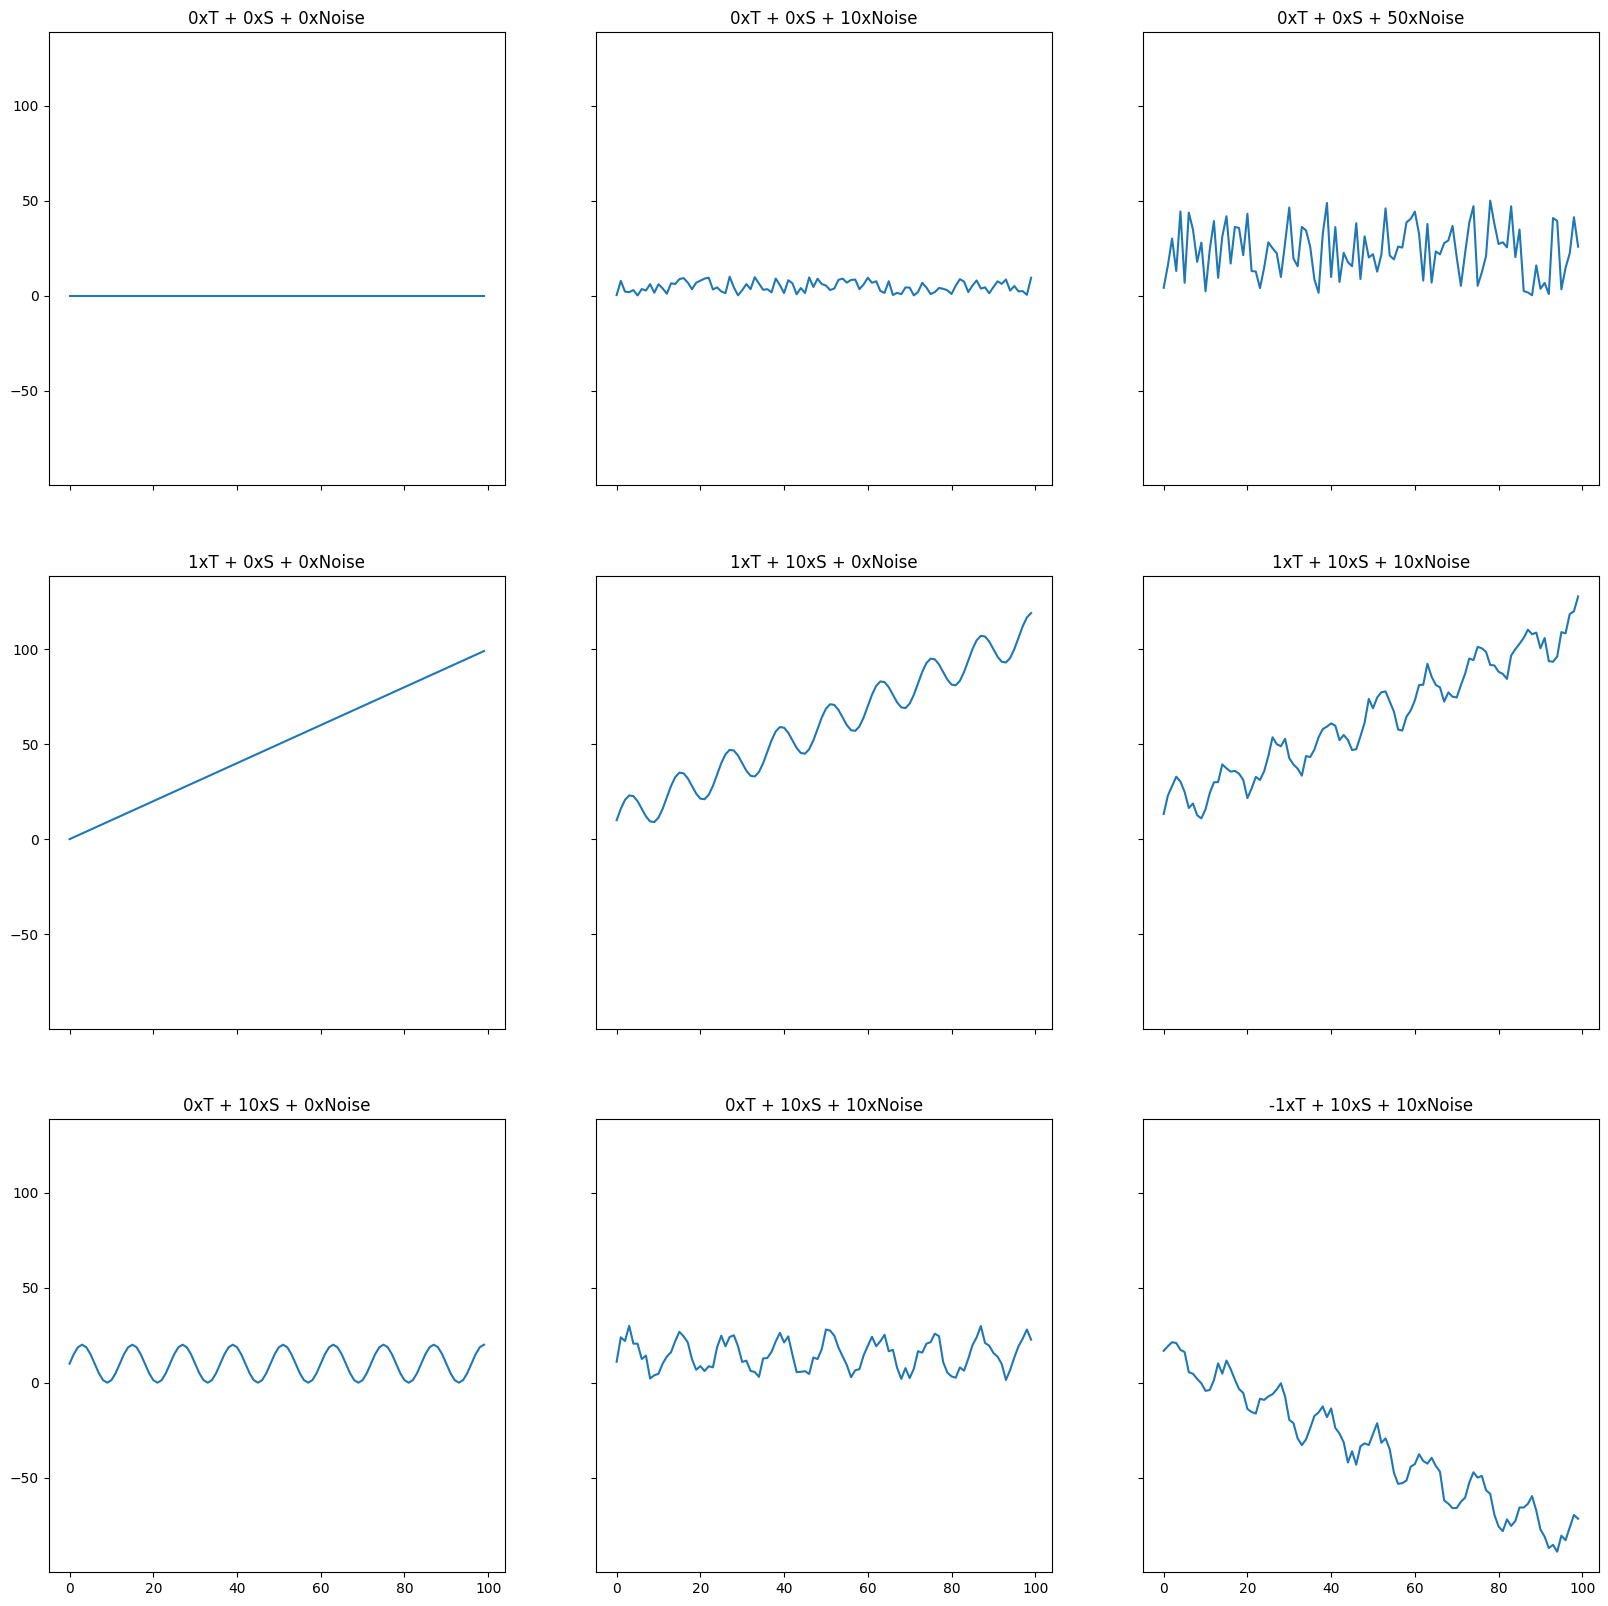

In [2]:
# examples of time series with level, trend, seasonality, and noise combinations in a subplot figure with 5 rows and 5 columns with different weights
fig, axes = plt.subplots(3, 3, figsize=(20, 20), sharex=True, sharey=True)

my_plot(axes, i=0, j=0, trend_weight=0, seasonality_weight=0, noise_weight=0, type='additive')
my_plot(axes, i=0, j=1, trend_weight=0, seasonality_weight=0, noise_weight=10, type='additive')
my_plot(axes, i=0, j=2, trend_weight=0, seasonality_weight=0, noise_weight=50, type='additive')

my_plot(axes, i=1, j=0, trend_weight=1, seasonality_weight=0, noise_weight=0, type='additive')
my_plot(axes, i=1, j=1, trend_weight=1, seasonality_weight=10, noise_weight=0, type='additive')
my_plot(axes, i=1, j=2, trend_weight=1, seasonality_weight=10, noise_weight=10, type='additive')

my_plot(axes, i=2, j=0, trend_weight=0, seasonality_weight=10, noise_weight=0, type='additive')
my_plot(axes, i=2, j=1, trend_weight=0, seasonality_weight=10, noise_weight=10, type='additive')
my_plot(axes, i=2, j=2, trend_weight=-1, seasonality_weight=10, noise_weight=10, type='additive')

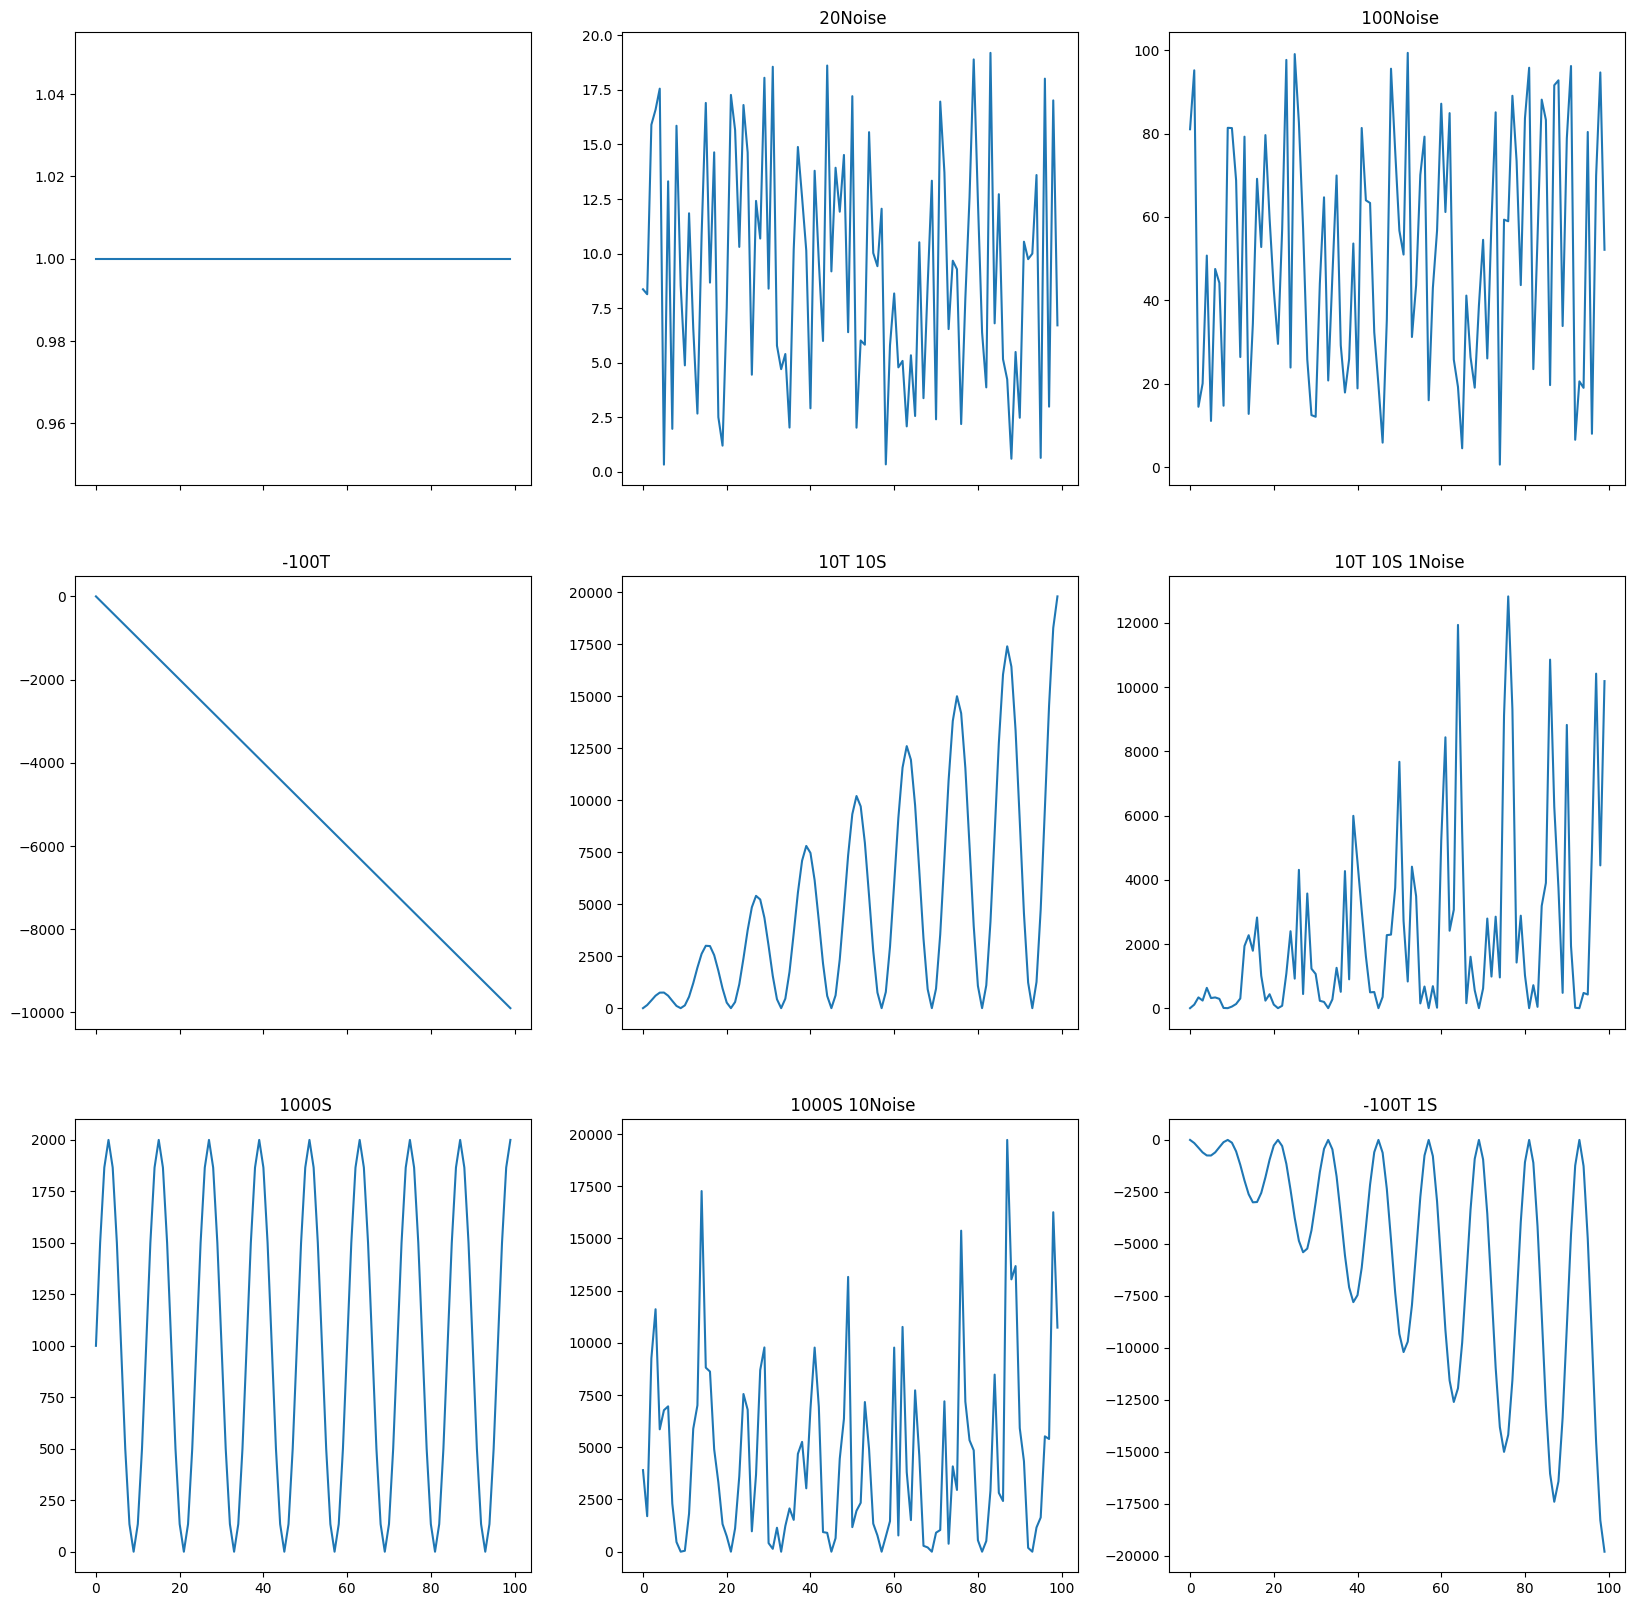

In [3]:
# examples of time series with level, trend, seasonality, and noise combinations in a subplot figure with 5 rows and 5 columns with different weights
fig, axes = plt.subplots(3, 3, figsize=(20, 20), sharex=True)

my_plot(axes, i=0, j=0, trend_weight=0, seasonality_weight=0, noise_weight=0, type='multiplicative')
my_plot(axes, i=0, j=1, trend_weight=0, seasonality_weight=0, noise_weight=20, type='multiplicative')
my_plot(axes, i=0, j=2, trend_weight=0, seasonality_weight=0, noise_weight=100, type='multiplicative')

my_plot(axes, i=1, j=0, trend_weight=-100, seasonality_weight=0, noise_weight=0, type='multiplicative')
my_plot(axes, i=1, j=1, trend_weight=10, seasonality_weight=10, noise_weight=0, type='multiplicative')
my_plot(axes, i=1, j=2, trend_weight=10, seasonality_weight=10, noise_weight=1, type='multiplicative')

my_plot(axes, i=2, j=0, trend_weight=0, seasonality_weight=1000, noise_weight=0, type='multiplicative')
my_plot(axes, i=2, j=1, trend_weight=0, seasonality_weight=1000, noise_weight=10, type='multiplicative')
my_plot(axes, i=2, j=2, trend_weight=-100, seasonality_weight=1, noise_weight=0, type='multiplicative')


How to distinguish between additive and multiplicative time series?
- The additive model is useful when the seasonal variation is relatively constant over time.
- The multiplicative model is useful when the seasonal variation increases over time.

To distinguish between additive and multiplicative time series, we can plot the log of the time series. If the log of the time series is linear, then the time series is multiplicative. If the log of the time series is not linear, then the time series is additive.

### Forecasting types

Times series forecasting is the process of predicting future values of a time series dataset. Generally, forecasting a time series can now be divided into two categories: __univariate TS forecasting__ and __multivariate TS forecasting__.

#### Univariate time series forecasting
- __Univariate time series forecasting__ refers to the process of predicting future values of a __single variable over time__, based on its past values. In other words, it involves analyzing a time series dataset that contains only one variable and using it to make predictions about its future behavior. Univariate time series forecasting methods typically involve identifying the underlying patterns or components of the time series, such as trend, seasonality, and noise, and then using statistical models to make predictions about future values based on these patterns. Some common univariate time series forecasting techniques include exponential smoothing, autoregressive integrated moving average (ARIMA) models, and seasonal decomposition of time series models. These methods can be used to make short-term or long-term forecasts, depending on the nature of the data and the forecasting problem.

For example, predicting the daily closing price of a stock based on its past prices is a univariate time series forecasting problem. In this case, the time series dataset contains only one variable (the daily closing price of the stock) and the goal is to predict its future values based on its past values.


#### Multivariate time series forecasting
- __Multivariate time series forecasting__ refers to the process of predicting future values of __multiple variables over time__, based on their past values and potential relationships among them. In other words, it involves analyzing a time series dataset that contains multiple variables and using them together to make predictions about their future behavior. Multivariate time series forecasting methods typically involve identifying the underlying patterns or components of the time series for each variable, such as trend, seasonality, and noise, and then using statistical models that can account for the __interactions among these variables to make joint predictions about their future behavior__. Some common multivariate time series forecasting techniques include vector autoregression (VAR) models, dynamic factor models, and neural network models. These methods also can be used to make short-term or long-term forecasts, depending on the nature of the data and the forecasting problem. Multivariate time series forecasting is often used in fields such as economics, finance, and environmental science, where multiple variables are known to interact and influence each other over time.

For example, predicting the daily closing price of a stock based on its past prices and other variables such as the daily closing prices of other stocks in the same industry is a multivariate time series forecasting problem. In this case, the time series dataset contains multiple variables (the daily closing prices of the stocks) and the goal is to predict their future values based on their past values and their relationships with each other.

In this context, __exogenous variables__ are external variables that are not part of the time series being analyzed, but are believed to have an influence on the dependent variable in the time series. In other words, exogenous variables are considered to be factors that are outside of the system being modeled but still impact the outcome of the system. In time series analysis, exogenous variables are often included in the model as additional predictors or inputs to improve the accuracy of the forecast.

For example, in economic forecasting, exogenous variables such as interest rates, inflation rates, and government policies may be included in the model to improve the accuracy of the forecast for a particular economic indicator. Exogenous variables are often distinguished from __endogenous variables__, which are variables that are part of the time series being analyzed and are affected by other variables in the system.


## Questions before doing forecastings

Before embarking on a TS forecasting project, it is important to consider several key questions to ensure that the analysis is appropriate for the data and the problem at hand. Some questions to ask before doing time series forecasting include:

- What is the goal of the analysis, and what decisions or actions will be based on the forecasted values?

- What is the time period and frequency of the data being analyzed, and is it stationary (i.e., do the statistical properties of the data remain consistent over time)?

- What are the underlying patterns or components of the time series, such as trend, seasonality, and noise, and how can they be accounted for in the forecasting model?

- What variables or factors might be influencing the time series that are not included in the data, and how can these exogenous variables be incorporated into the forecasting model?

- What is the appropriate forecasting horizon for the problem at hand, and what level of accuracy is required for the forecasted values?

- How much data do you have at your disposal, and can you compile it all?

- Are projections subject to regular revision over time, or must they only be created once and remain unchanged? Forecasts that are updated as new data becomes available frequently produce more precise predictions.

- How frequently should forecasts be made? Forecasts can frequently be generated at lower or higher frequencies, enabling you to take use of down- and up-sampling of data, which can be advantageous for modeling.

By answering these questions, analysts can ensure that they are using appropriate methods and models for the time series forecasting problem, and that the resulting forecasts are reliable and actionable.


## Types of time series
As already mentioned, there are different types of TS that can be categorized based on various characteristics of the data. Here are some of the most common types of time series:

- __Trend time series__: A trend TS is a type of time series that exhibits a long-term trend or pattern over time, which can be increasing or decreasing. Trend time series are commonly observed in economic, financial, and demographic data.

- __Seasonal time series__: A seasonal time series is a type of time series that exhibits regular patterns or cycles over time, such as daily, weekly, or yearly seasonality. Examples of seasonal time series include monthly sales data for a retailer, daily temperature readings, or hourly electricity demand.

- __Cyclical time series__: A cyclical time series is a type of time series that exhibits cycles or fluctuations over time, but the cycles do not have a fixed length or regular pattern. Cyclical time series are often observed in economic and financial data.

- __Irregular time series__: An irregular time series is a type of time series that does not exhibit any specific patterns or trends, and the data appears to be random or unpredictable. Irregular time series are often observed in data that is subject to random noise or measurement errors.

- __Event time series__: An event time series is a type of time series that represents the occurrence or frequency of specific events over time.

- __Spatio-temporal time series__: A spatio-temporal time series is a type of time series that includes data on both time and space. This type of data is often used in environmental and geographical research to study the changes in environmental variables over time and space.

These different types of time series may require different mathematical and statistical techniques to analyze and model, depending on the nature of the data and the research questions being asked.

## Libraries for Time Series

 In this TS context, an ecosystem of Python libraries for science, technology, and math makes up SciPy. You will want it as a Python add-on if you wish to forecast time series. For the majority of SciPy libraries, NumPy for efficient array operations and Matplotlib for data visualization serve as the foundation. Python's time series forecasting essentials are provided by three higher-level SciPy libraries. For data handling, time series modeling, and machine learning, respectively, they are Pandas, Statsmodels, scikit-learn etc. The list of packages used in the report include:

- __Pandas__: Pandas (https://pandas.pydata.org) is an open-source data manipulation library for Python that allows you to easily work with and analyze structured data like spreadsheets and SQL tables. It provides a powerful data frame object for manipulating and analyzing data.

- __Scikit-learn (sklearn)__: Scikit-learn (https://scikit-learn.org/stable/) is a machine learning library for Python that provides various tools and algorithms for data analysis and machine learning tasks. It includes algorithms for classification, regression, clustering, and dimensionality reduction, among others.

- __Mplfinance__: Mplfinance (https://github.com/matplotlib/mplfinance) is a Python library that provides tools for visualizing financial data. It is built on top of the popular Matplotlib library and provides a simple interface for creating candlestick and OHLC charts.

- __Yfinance__: yfinance (https://pypi.org/project/yfinance/) is a Python library that provides an easy way to download historical market data from Yahoo Finance. It allows you to download stock prices, options data, and other financial data.

- __Calplot__: Calplot (https://pypi.org/project/calplot/) is a Python library for creating calendar plots, which are useful for visualizing time series data. It provides a simple interface for creating monthly, yearly, and custom calendar plots.

- __Seaborn__: Seaborn (https://seaborn.pydata.org) is a data visualization library for Python that is built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.

- __Statsmodels__: Statsmodels (https://www.statsmodels.org/stable/index.html) is a Python library that provides a wide range of statistical tools and models for data analysis. It includes regression analysis, time series analysis, and multivariate analysis, among other things.

- __Prophet__: Prophet (https://github.com/facebook/prophet) is a time series forecasting library for Python that is built by Facebook. It provides a simple interface for creating forecasts based on historical time series data.

- __Keras__: Keras (https://keras.io) is a high-level neural networks library for Python that provides a simple and powerful interface for building and training deep learning models. It supports multiple backends, including TensorFlow, and is widely used for tasks like image recognition and natural language processing.

- __TensorFlow__: TensorFlow (https://www.tensorflow.org) is an open-source machine learning library for Python that is widely used for deep learning tasks. It provides a flexible platform for building and training machine learning models, including neural networks. TensorFlow is used by many large organizations, including Google, Uber, and Airbnb.


## Examples of TS

Time series analysis is a powerful technique that can be used to make predictions about future values of a variable based on its past values or in the detection of outliers/anomalies/novelties. In this context, there are many applications of time series analysis in a variety of industries, including finance, economics, marketing, and engineering, among others. Here are some examples of time series forecasting:

- **Stock prices**: Predicting future stock prices based on historical data can be a challenging task, but it is one of the most popular use cases for time series forecasting. Investors and traders often use time series models to forecast stock prices and make better investment decisions.

- **Weather forecasting**: Forecasting weather patterns is another common application of time series analysis. Meteorologists use historical data to build models that can predict weather conditions for future time periods.

- **Energy demand**: Time series forecasting is often used to predict energy demand for power plants, electricity grids, and other energy systems. This information can help energy providers to better plan for future needs and optimize their operations.

- **Sales forecasting**: Retailers use time series forecasting to predict sales for upcoming periods. This helps them to make better decisions about inventory management, staffing, and marketing strategies.

- **Website traffic**: Online businesses use time series forecasting to predict website traffic and plan for future capacity needs. This can help them to ensure that their websites can handle high levels of traffic during peak periods.

- **Traffic flow**: Time series models can be used to predict traffic flow on highways and other transportation networks. This information can be used to optimize traffic flow and reduce congestion.

- **Disease outbreaks**: Time series models can be used to predict the spread of infectious diseases based on historical data. This can help public health officials to prepare for outbreaks and take appropriate measures to contain them.

- **Fraud Detection**: In finance, anomaly detection can be used to detect fraudulent transactions or unusual activity in financial data. For example, credit card companies may use anomaly detection to identify transactions that are significantly different from a customer's usual spending behavior.

- **Equipment Monitoring**: In manufacturing, anomaly detection can be used to monitor the performance of equipment and identify potential issues before they cause downtime or failure. For example, sensors on a machine may detect unusual vibrations or temperature changes that could indicate a problem.

- **Cybersecurity**: In network security, anomaly detection can be used to detect unusual traffic patterns or behavior that could indicate a potential cyberattack. For example, an intrusion detection system may monitor network traffic for unusual spikes in activity or unusual connection attempts.

- **Medical Monitoring**: In healthcare, anomaly detection can be used to monitor patient health data and identify potential health issues. For example, sensors on a patient's body may detect unusual heart rhythms or other indicators that could indicate a potential medical problem.

- **Traffic Management**: In transportation, anomaly detection can be used to monitor traffic patterns and identify potential issues, such as accidents or road closures. For example, sensors on a highway may detect unusual traffic patterns or slowdowns that could indicate a problem.

These are just a few examples of the many applications of time series forecasting. In the remaining section will be looking at some examples with more detail.



### Sun spots example

The sunspot time series is a historical record of the number of sunspots observed on the sun over a period of several hundred years. Sunspots are dark spots on the sun that are cooler than the surrounding areas and are caused by magnetic activity. The sunspot time series is an example of a time series that exhibits cyclical patterns and can be used to demonstrate various time series analysis techniques.

![sunspots](https://upload.wikimedia.org/wikipedia/commons/f/f8/NASA%27s_SDO_Observes_Largest_Sunspot_of_the_Solar_Cycle_%2815430820129%29.jpg)

One tool that can be used to analyze the sunspot time series is the pandas library in Python. To start the analysis of the sunspot time series in pandas, we first need to import the library and the sunspot data set. In this case, we consider the sunspot data was already download and saved in the data folder (see https://www.kaggle.com/datasets/robervalt/sunspots).

In [4]:
import pandas as pd
df_sunspots = pd.read_csv('./data/sunspots_TS/sunspots.zip', index_col=0)

Next, we can inspect the first few rows of the data set to get a sense of the data and its structure. For that, the `head()` method will output the first five rows of the sunspot data set:

In [7]:
df_sunspots.head(5)

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


We can see that the data set has two columns: `Date`, `Monthly Mean Total Sunspot Number`. The `Date` column represents the month for which the sunspot count was recorded, and the `Monthly Mean Total Sunspot Number` column represents the values obtained by taking a simple arithmetic mean of the daily total sunspot number over all days of each calendar month. The columns list can also be achieved using the `columns` property

In [8]:
df_sunspots.columns

Index(['Date', 'Monthly Mean Total Sunspot Number'], dtype='object')

Important, for further analysis, we can see that the `Date` column is not a 'date' for pandas.

In [9]:
df_sunspots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3265 non-null   object 
 1   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), object(1)
memory usage: 76.5+ KB


In Pandas, you can convert a column to a datetime format using the `pd.to_datetime()` function. You can specify the format of the dates in the column using the format parameter. In the following example, the format parameter is set to '%Y-%m-%d', which corresponds to a date in the format YYYY-MM-DD. If your dates are in a different format, you can specify the correct format using the appropriate codes.

In [10]:
df_sunspots['Date'] = pd.to_datetime(df_sunspots['Date'], format='%Y-%m-%d')
df_sunspots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               3265 non-null   datetime64[ns]
 1   Monthly Mean Total Sunspot Number  3265 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 76.5 KB


Next, we can visualize the sunspot time series data to get a sense of the overall pattern in the data. One way to do this is by plotting the sunspot count over time using the `plot()` method in pandas. This will produce a line plot of the sunspot count over time, which should show that the sunspot count is not constant over time, but instead exhibits cyclical patterns with periods of high and low sunspot activity.

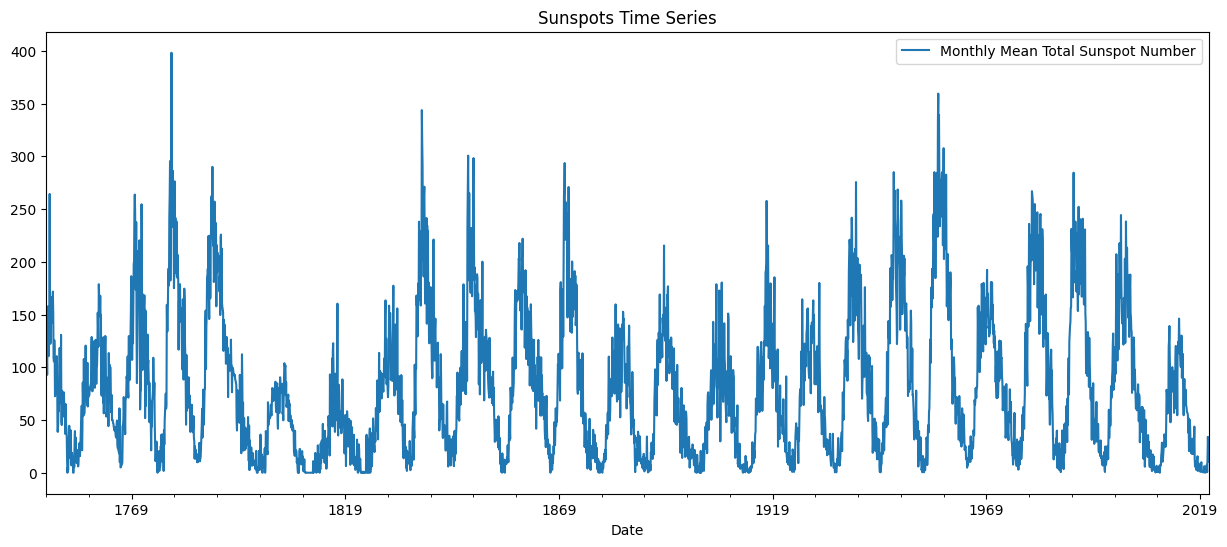

In [11]:
_ = df_sunspots.plot(x='Date', 
                     y='Monthly Mean Total Sunspot Number', 
                     figsize=(15, 6), 
                     title='Sunspots Time Series')

In addition to visualizing the data, we can also perform some basic descriptive statistics on the sunspot time series. For example, we can calculate the monthly mean, median, standard deviation, and other summary statistics using the `describe()` method in pandas.

In [12]:
df_sunspots.describe()

,Date,Monthly Mean Total Sunspot Number
count,3265,3265.000000
mean,1885-01-29 02:35:41.255742976,81.778775
min,1749-01-31 00:00:00,0.000000
25%,1817-01-31 00:00:00,23.900000
50%,1885-01-31 00:00:00,67.200000
75%,1953-01-31 00:00:00,122.500000
max,2021-01-31 00:00:00,398.200000
std,NaN,67.889277


From these summary statistics, we can see that the mean sunspot count was around 81.778775 per month, with a standard deviation of 67.889277. We can also see that the minimum and maximum sunspot counts are 0 and 398.2, respectively.

Similar stats are presented also for the date column

#### Resampling and Decomposition

##### Datetime in Pandas [note]

As a first note, there are several time/date properties that one can access from Timestamp or a collection of timestamps like a DatetimeIndex.

| **Property**       | **Description**  |
|--------------------|------------------|
| **year**           | The year of the datetime |
| **month**          | The month of the datetime | 
| **day**            | The day of the datetime |
| **hour**           | The hour of the datetime |
| **minute**         | The minute of the datetime |
| **second**         | The second of the datetime |
| **microsecond**    | The microsecond of the datetime |
| **nanosecond**     | The nanosecond of the datetime |
| **week**           | The week of the datetime |
| **weekday**      | The day of the week of the datetime |
| **dayofyear**      | The day of the year of the datetime |
| **quarter**        | The quarter of the datetime |
| **is_leap_year**   | Whether the datetime is a leap year |
| **days_in_month**  | The number of days in the month of the datetime |
| **quarter**        | The quarter of the datetime |
| **is_month_start** | Logical indicating if first day of month (defined by frequency) |
| **is_month_end**   | Logical indicating if last day of month (defined by frequency) |
| **is_quarter_start** | Logical indicating if first day of quarter (defined by frequency) |
| **is_quarter_end** | Logical indicating if last day of quarter (defined by frequency) |
| **is_year_start** | Logical indicating if first day of year (defined by frequency) |
| **is_year_end** | Logical indicating if last day of year (defined by frequency) |
| **is_leap_year** | Whether the datetime is a leap year |

To extract the values we can use the corresponding properties

In [13]:
df_sunspots["Date"].dt.year

0       1749
1       1749
2       1749
3       1749
4       1749
        ... 
3260    2020
3261    2020
3262    2020
3263    2020
3264    2021
Name: Date, Length: 3265, dtype: int32

In [14]:
df_sunspots["Date"].dt.month

0        1
1        2
2        3
3        4
4        5
        ..
3260     9
3261    10
3262    11
3263    12
3264     1
Name: Date, Length: 3265, dtype: int32

But, let us go back to the time series data. The time series data can be stored in a pandas DataFrame or Series, where the index is a datetime object. The datetime object can be created using the `pd.to_datetime` function, which converts a string or integer to a datetime object. The datetime object can be used to index the time series data, which allows for easy manipulation and analysis of the data.

Once the column has been converted to a datetime format, you can perform various time-series operations, such as resampling, aggregation, and time-based indexing. This makes it much easier to work with time-series data in Pandas.

In Pandas, you can resample time-series data to a different frequency using the `resample` method. The `resample` method allows you to aggregate data to a higher or lower frequency. For example, you can resample daily data to monthly or yearly data. In this case, the object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`, or `TimedeltaIndex`), or the caller must pass the label of a datetime-like series/index to the `on/level` keyword parameter.

So, first, e.g., we need to set the index as the `Date`

In [15]:
df_sunspots = df_sunspots.set_index('Date')
df_sunspots.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


To resample the data to a yearly frequency, you can use the following code, where it is passed the frequency 'YE', which represents the end of the year. The `mean` method is called on the resampled data to compute the mean value for each year.


The resulting DataFrame, `df_yearly`, will have a new index that corresponds to the end of each year and will contain the mean values for each year. This makes it easy to analyze and visualize the data at a higher frequency, in this case, yearly.

,Yearly Mean Total Sunspot Number
Date,
1749-12-31,134.875000
1750-12-31,139.000000
1751-12-31,79.441667
1752-12-31,79.666667
1753-12-31,51.125000


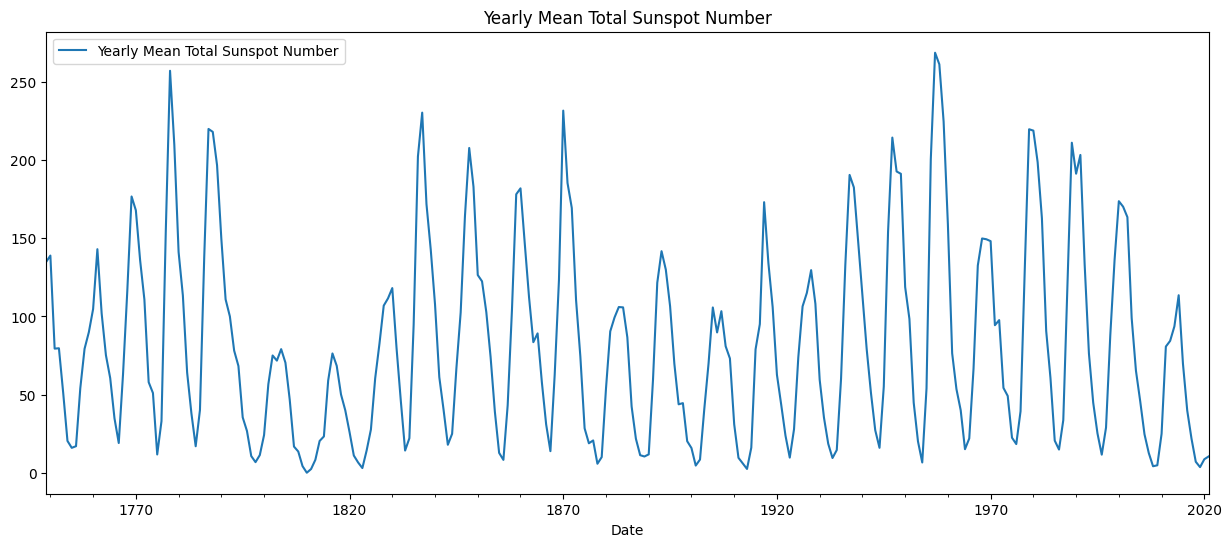

In [19]:
df_yearly = df_sunspots.resample('YE').mean()
df_yearly.columns=['Yearly Mean Total Sunspot Number']

# plot the yearly mean sunspot count
df_yearly.plot(figsize=(15, 6), title='Yearly Mean Total Sunspot Number')

# print the first five rows of the data set
df_yearly.head()

The sampling intervals can be found in https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects. Some of the possible frequency strings are:

| **Frequency strings** | **Description**       |
|-----------------------|-----------------------|
| **D**                 | Calendar day frequency |
| **W**                 | Weekly frequency      |
| **ME, M**             | Month end frequency   |
| **QE, Q**             | Quarter end frequency |
| **YE, A**             | Year end frequency    |
| **YS, AS**                | Year start frequency  |
| **H**                 | Hourly frequency      |
| **T, min**            | Minutely frequency    |
| **S**                 | Secondly frequency    |
| **L, ms**             | Millisecond frequency |
| **U, us**             | Microsecond frequency |
| **N**                 | Nanosecond frequency  |


Possible function include: 'mean', 'sum', 'max', 'min', 'median', 'std', 'var', 'first', 'last', 'ohlc' (open, high, low, close), etc.


To show the cyclical behavior of the sunspot time series in code, we can use the `decompose` function from the `statsmodels` library. The `decompose` function allows us to decompose the time series into its trend, seasonality, and residual components.

The next code will produce a plot that shows the trend, seasonality, and residual components of the sunspot time series. The seasonal component shows the cyclical pattern in the data, and in this case, we can clearly see the 11-year cycle in the sunspot time series. The trend component shows the overall direction of the time series, and the residual component shows the variation in the time series that cannot be explained by the trend and seasonality components.

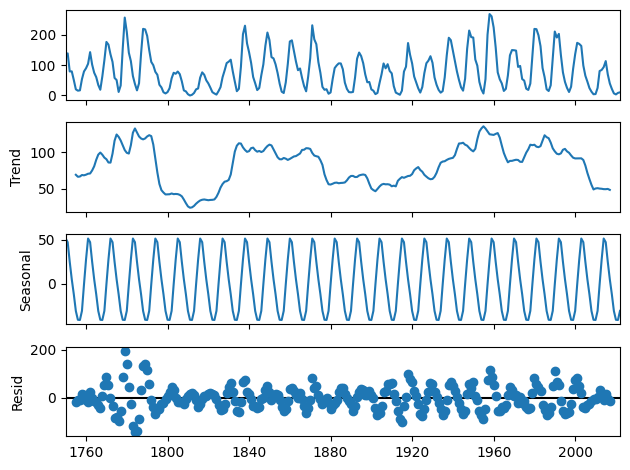

In [20]:
# !pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# decompose the time series into trend, seasonal, and residual components
# choose the period to be 11 to capture the 11-year cycle in the data - try changing the period to see how the plot changes
result = seasonal_decompose(df_yearly, model='additive', period=11)
fig = result.plot(observed=True, seasonal=True, trend=True)

Since the series in mainly cyclical, we can also decompose it using a multiplicative model. However, since the series has a zero value, we need to add a small value to the series to avoid getting NaN values in the decomposition.

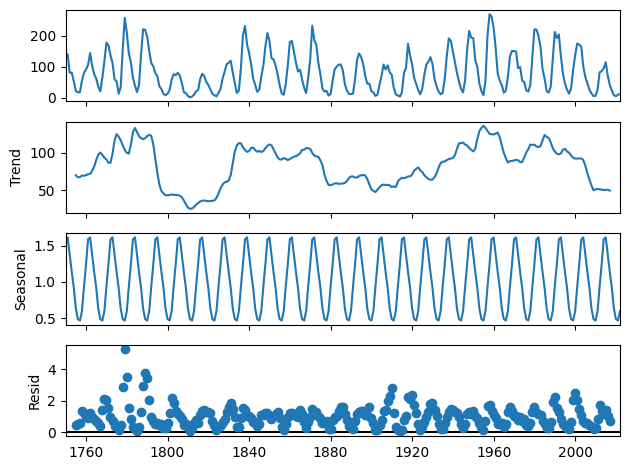

In [21]:
result = seasonal_decompose(df_yearly+1, model='multiplicative', period=11)
fig = result.plot(observed=True, seasonal=True, trend=True, resid=True)

We can do the same, on a $11 \times 12$ month cycle if we are looking at the original monthly data

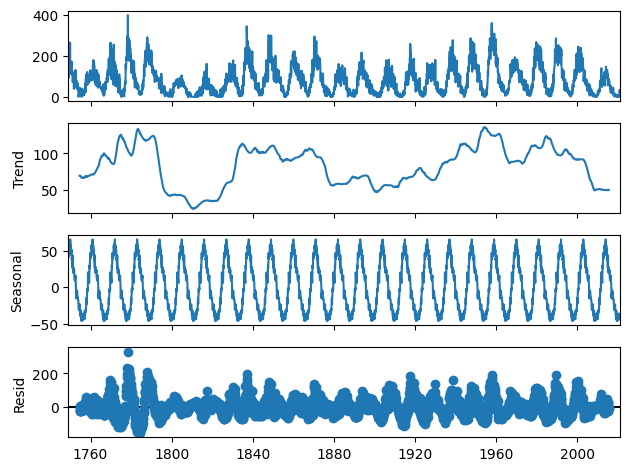

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_sunspots, model='additive', period=11*12)
fig = result.plot()

Another way to see the cycle

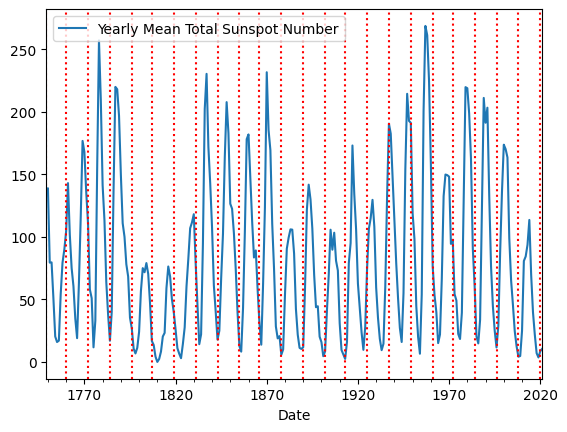

In [23]:
ax = df_yearly.plot()

for date in pd.date_range('1749-01-01', '2020-01-01', int((2022-1749)/11)):
    ax.axvline(date, color='red', linestyle=':')

### Airline passengers Example

The Airline passengers data is a dataset containing the total number of international airline passengers per month (in thousands) from 1949 to 1960. This dataset has been thoroughly examined and is considered a classic in the time series literature.

The data follow a 12-month cyclic pattern that is consistent year after year and is based on the calendar year. Thus, the data on Air Passengers is another example of seasonal data. Furthermore, the data tends upward over time. In other words, the number of airline passengers is growing over time.

In [24]:
# load data
df_airline = pd.read_csv('./data/passengers_TS/passengers.csv', index_col='Unnamed: 0')

# print the first rows of the dataframe
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


As previously, let us convert the data to a datetime format and set the index to the `Month` column.

In [25]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline.set_index('Month', inplace=True)
df_airline

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


And now, we can plot the data and see the year cycle and trend

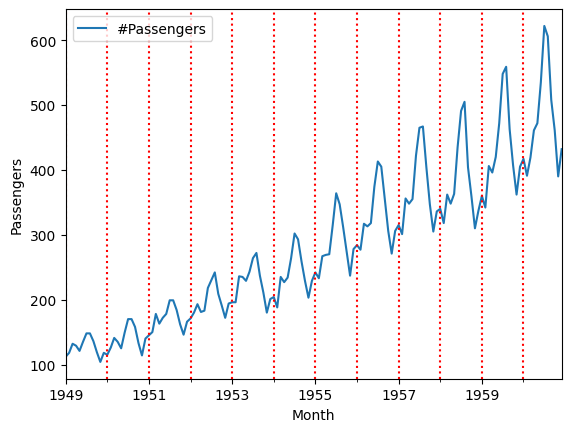

In [26]:
ax = df_airline.plot()
ax.set_ylabel('Passengers')
ax.set_xlabel('Month')

# plot year separators
for date in pd.date_range('1949-01-01', '1961-01-01', 13):
    ax.axvline(date, color='red', linestyle=':')

In this case, we can see that the number of airline passengers is increasing over time, and there is a clear 12-month cycle in the data. The number of passengers is higher in the summer months and lower in the winter months. Furthermore, the difference between the number of passengers in the summer and winter months is increasing over time, which is consistent with multiplicative time series.

Also, plotting the log of the data can help us see the trend more clearly and decide on the multiplicative model.

<Axes: xlabel='Month'>

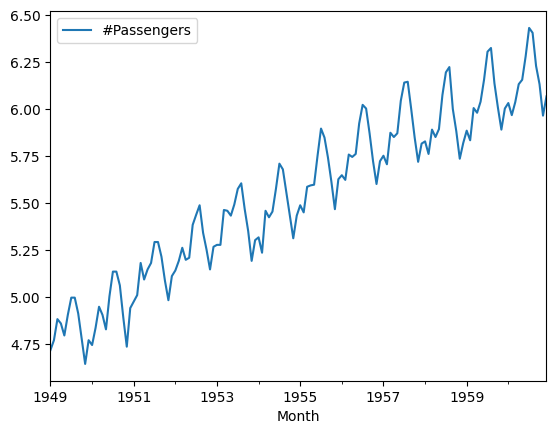

In [27]:
np.log(df_airline).plot()

So, sgain, we can see the trend, seasonality, and residual components of the time series in the next plot.

The seasonal component shows the cyclical pattern in the data, and in this case, we can clearly see the 1-year cycle in the passengers time series. The trend component shows the overall direction of the time series, which in this case is growing, and the residual component shows the variation in the time series that cannot be explained by the trend and seasonality components.

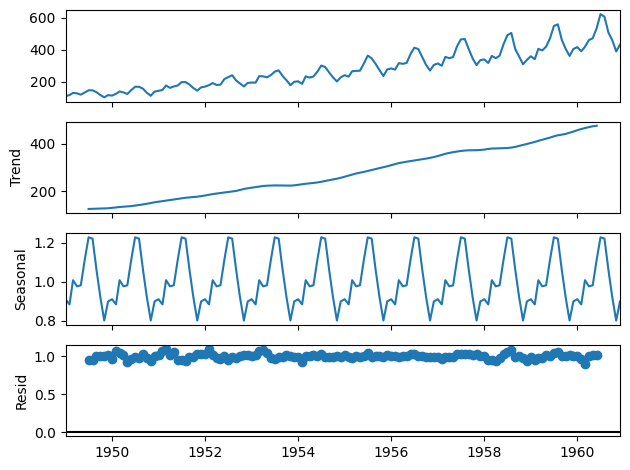

In [28]:
result = seasonal_decompose(df_airline, model='multiplicative', period=12)
fig = result.plot()

## Moving average to check trends

A moving average plot can be used to determine the type of trend that a time series may have. We calculate the average of the values contained inside a sliding window of a specific width in order to calculate the moving average of a time series. The goal is to eliminate any short-term swings from the series, leaving only long-term variations.

Let's see how we can use a moving average plot to determine the type of trend that the Airline passengers time series has. We will use a window of 12 months, which corresponds to the 12-month cycle in the data.

In [29]:
import pandas as pd
df_airline = pd.read_csv('./data/passengers_TS/passengers.csv', index_col='Month')
df_airline.drop('Unnamed: 0', axis=1, inplace=True)
df_airline.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


Recall the plot of the data

<Axes: xlabel='Month'>

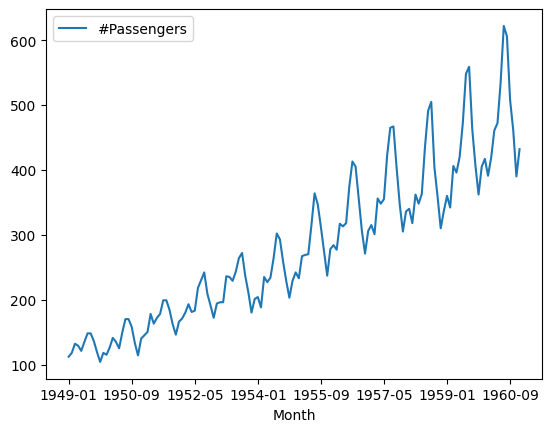

In [30]:
df_airline.plot()

And now the moving average computation and plot it seeing the trend (which was already obvious in the original plot)

In [ ]:
delta_t = 12

ax = pd.Series([df_airline.iloc[t-delta_t:t, 0].mean() for t in range(delta_t, len(df_airline))]).plot()
df_airline.iloc[:-delta_t, :].plot(ax=ax)

A more sophisticated computation could be done using the `rolling` method of the dataframe (see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) for more details)

<Axes: xlabel='Month'>

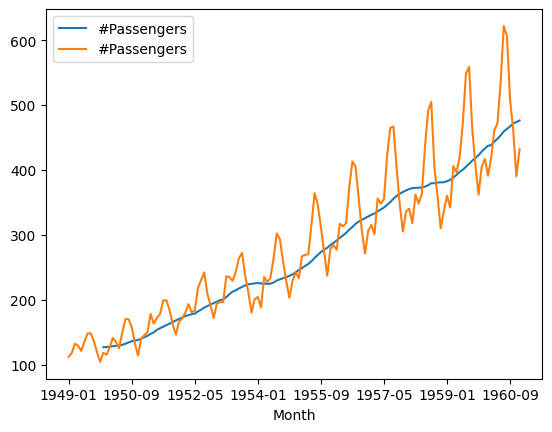

In [33]:
ax = df_airline.rolling(12).mean().plot()
df_airline.plot(ax=ax)